<a href="https://colab.research.google.com/github/davidcorredor10/UAO/blob/main/tratamiento_horse_colic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Primera entrega proyecto final**

**Aprendizaje Automático​**




David Felipe Corredor​

Diana Marcela Cristancho​

Edwin Yamith Zúñiga​

Lino Santiago Zamora​

p

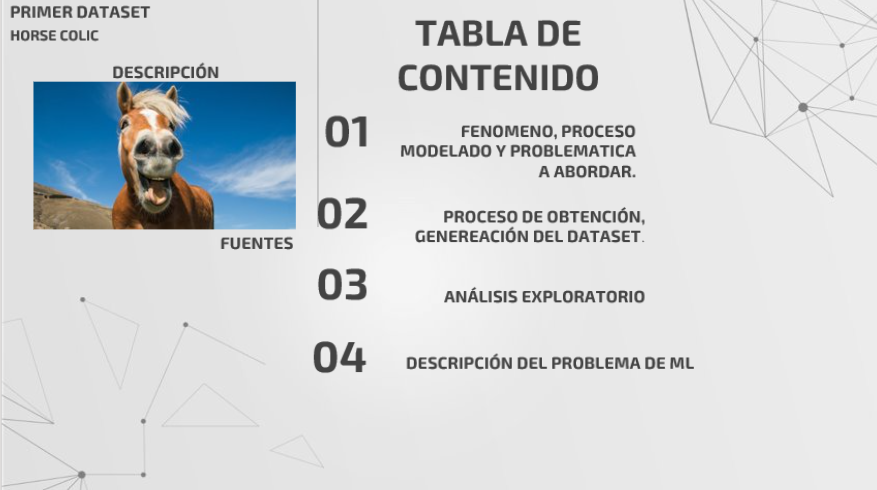

##Dataset: Horse colic


El cólico puede ocurrir debido a la mala motilidad. En la mayoría de los casos, la causa de la motilidad deficiente no está clara. La motilidad deficiente puede relacionarse con infecciones en el intestino o en la cavidad abdominal. Estos caballos a menudo se enferman debido a las toxinas que provienen del intestino


 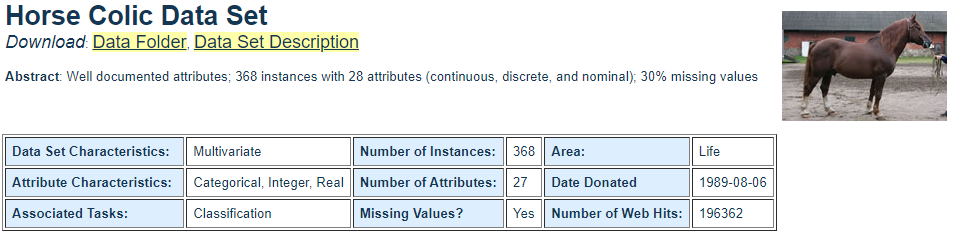

#Fuente :

**Creators:**

Mary McLeish & Matt Cecile

Department of Computer Science

University of Guelph

Guelph, Ontario, Canada N1G 2W1


**Donor:**

Will Taylor


#Index of horse-colic



17 Jul 1992    25437 horse-colic.data<br>
17 Jul 1992     9599 horse-colic.names.original<br>
17 Jul 1992     5807 horse-colic.test<br>
19 Jul 1992     9045 horse-colic.names<br>
02 Dec 1996      212 Index

In [ ]:

# instalamos los paquetes
#Datasets
#In machine learning, you fit a model on a dataset. Datasets are stored in tables. This tables are in fact a matrices: a key data structure in linear algebra. Further, when you split the data into inputs and outputs to fit a supervised machine learning model, you have a matrix (X) and a vector (y). The vector is another key data structure in linear algebra.


!pip install joblib==1.1.0
!pip install mglearn

importamos las librerias requeridas para manejo de datasets, datos estadisticos y gráficos

In [ ]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests

%matplotlib inline

Realizamos la carga de datos desde la página fuente de datos UCI:


*   Definimos nombre para cada columna
*   Traemos los datos a través de la URL de la página UCI
*   Se realiza la creación del dataframe de entrenamiento con los nombres de las columnas y los datos






In [ ]:
df_names=["surgery", "Age", "Hospital_Number", "rectal_temperature", "Pulse", "respiratory_rate", "temperature_of_extremities ", "peripheral_pulse", "mucous_membrane", "capillary_refill_time", "pain", "peristalsis", "abdominal_distension", "nasogastric_tube", "nasogastric_reflux", "nasogastric_reflux_PH", "rectal_examination", "abdomen", "packed_cell_volume", "total_protein", "abdominocentesis_appearance", "abdomcentesis_total_protein", "outcome", "surgical_lesion", "type_of_lesion_1", "type_of_lesion_2", "type_of_lesion_3", "cp_data"
]
url_entrenamiento = "https://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data"
url_prueba= "https://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.test"

df_entrenamiento = pd.read_csv(url_entrenamiento, delimiter=" ", names=df_names)
df_prueba = pd.read_csv(url_entrenamiento, delimiter=" ", names=df_names)


Identificamos cantidad de datos nulos iniciales

In [ ]:
df_entrenamiento.isnull().sum()
df_prueba.isnull().sum()

In [ ]:
#Muestra los datos unicos por cada atributo para identificar los datos nulos
for col in df_entrenamiento.columns:
    print('{} : {}'.format(col,df_entrenamiento[col].unique()))

reemplazamos los datos "?" a Nan

In [ ]:
for col in df_entrenamiento.columns:
    df_entrenamiento[col].replace({'?':np.nan},inplace=True)
df_entrenamiento.isnull().sum()

for col in df_prueba.columns:
    df_prueba[col].replace({'?':np.nan},inplace=True)
df_prueba.isnull().sum()

In [ ]:
#vemos el volumen de datos nulos frente a los demás atributos
import seaborn as sns
sns.heatmap(df_entrenamiento.isnull(),cbar=False,cmap='viridis')

In [ ]:
#Tipos de dato por atributo
df_entrenamiento.info()
df_prueba.info()

In [ ]:
for col in df_entrenamiento.columns[:28]:
    df_entrenamiento[col]=df_entrenamiento[col].astype(float)
df_entrenamiento.info()
for col in df_prueba.columns[:28]:
    df_prueba[col]=df_prueba[col].astype(float)
df_prueba.info()


In [ ]:
df_entrenamiento.info()

In [ ]:
display(df_entrenamiento)

In [ ]:
df_entrenamiento.describe()

In [ ]:
#cambio de tipo de dato la columna 2
df_entrenamiento['Hospital_Number']=df_entrenamiento['Hospital_Number'].astype(np.int64)
df_entrenamiento.info()

In [ ]:
df_entrenamiento.describe()

In [ ]:
#dataframe[(dataframe['Physics'] > 10) &   (dataframe['Chemistry'] > 11) &  (dataframe['Math'] > 9)]['Name'].count())
sum_distension4 = df_entrenamiento[(df_entrenamiento['abdominal_distension'] == 4)]['abdominal_distension'].count()

porcentaje=sum_distension4/300
print(df_entrenamiento['abdominal_distension'].count())
print(porcentaje)
#### change describe max columns search "pandas " 

In [ ]:
df_entrenamiento['rectal_examination'].describe()

In [ ]:
for col in df_entrenamiento.columns:
    print('{} : {}'.format(col,df_entrenamiento[col].unique()))

In [ ]:
#revisamos si el dataset contiene valores duplicados- como respuesta recibimos que no contiene registros duplicados
df_entrenamiento[df_entrenamiento.duplicated(keep=False)]

**ATRIBUTO CATEGÓRICO**

<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Atributo</th>
    <th class="tg-0lax">Traduccion</th>
    <th class="tg-0lax">Valor</th>
    <th class="tg-0lax">Descripcion</th>
    <th class="tg-0lax">Observacion</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">Surgery</td>
    <td class="tg-0lax">Cirugía</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">Si  tuvo cirugía</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">2</td>
    <td class="tg-0lax">Fue tratado sin cirugía</td>
    <td class="tg-0lax"></td>
  </tr>
</tbody>
</table>


In [ ]:
plt.figure()
plt.rcParams['figure.figsize'] = [5, 5]
plt.title(df_names[0])
df_entrenamiento.iloc[:,0].hist()

**ATRIBUTO CATEGÓRICO**

<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Atributo</th>
    <th class="tg-0lax">Traduccion</th>
    <th class="tg-0lax">Valor</th>
    <th class="tg-0lax">Descripcion</th>
    <th class="tg-0lax">Observacion</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">Age </td>
    <td class="tg-0lax">Edad</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">Caballo adulto (≥ 6 meses)</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">2</td>
    <td class="tg-0lax">Caballo Joven (<6 meses)</td>
    <td class="tg-0lax"></td>
  </tr>
</tbody>
</table>

In [ ]:
plt.figure()
plt.rcParams['figure.figsize'] = [5, 5]
plt.title(df_names[1])
df_entrenamiento.iloc[:,1].hist()

**ATRIBUTO CONTINUO**

<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Atributo</th>
    <th class="tg-0lax">Traduccion</th>
    <th class="tg-0lax">Valor</th>
    <th class="tg-0lax">Descripcion</th>
    <th class="tg-0lax">Observacion</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">Hospital Number </td>
    <td class="tg-0lax">No. HOSPITAL</td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">Identificación númerica</td>
    <td class="tg-0lax">el número de caso asignado al caballo (puede no ser único si el caballo es tratado > 1 vez)</td>
  </tr>
</tbody>
</table>

In [ ]:
plt.figure()
plt.rcParams['figure.figsize'] = [5, 5]
plt.title(df_names[2])
df_entrenamiento.iloc[:,2].hist()

**ATRIBUTO CONTINUO**

<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Atributo</th>
    <th class="tg-0lax">Traduccion</th>
    <th class="tg-0lax">Valor</th>
    <th class="tg-0lax">Descripcion</th>
    <th class="tg-0lax">Observacion</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">rectal_temperature </td>
    <td class="tg-0lax">TEMPERATURA RECTAL</td>
    <td class="tg-0lax">lineal en grados centigrados</td>
    <td class="tg-0lax"> la temperatura puede reducirse cuando el animal está en estado de shock tardío
- la temperatura normal es de 37,8
- este parámetro generalmente cambiará a medida que avanza el problema, p. puede comenzar normal, luego elevarse debido a la lesión, volviendo al rango normal cuando el caballo entra en estado de shock </td>
    <td class="tg-0lax"></td>
  </tr>
</tbody>
</table>

In [ ]:
plt.figure()
plt.rcParams['figure.figsize'] = [5, 5]
plt.title(df_names[3])
df_entrenamiento.iloc[:,3].hist()

**ATRIBUTO Numérico**

<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Atributo</th>
    <th class="tg-0lax">Traduccion</th>
    <th class="tg-0lax">Valor</th>
    <th class="tg-0lax">Descripcion</th>
    <th class="tg-0lax">Observacion</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">pulse </td>
    <td class="tg-0lax">pulso</td>
    <td class="tg-0lax">lineal</td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">la frecuencia cardíaca en latidos por minuto - es un reflejo de la condición cardíaca: 30 -40 es normal para los adultos - es raro tener una frecuencia inferior a la normal aunque los caballos atléticos pueden tener una frecuencia de 20-25 - los animales con lesiones dolorosas o que sufren de shock circulatorio pueden tener una frecuencia cardíaca elevada</td>
  </tr>
</tbody>
</table>

In [ ]:
plt.figure()
plt.rcParams['figure.figsize'] = [5, 5]
plt.title(df_names[4])
df_entrenamiento.iloc[:,4].hist()

**ATRIBUTO Numérico**

<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Atributo</th>
    <th class="tg-0lax">Traduccion</th>
    <th class="tg-0lax">Valor</th>
    <th class="tg-0lax">Descripcion</th>
    <th class="tg-0lax">Observacion</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">respiratory_rate </td>
    <td class="tg-0lax">FRECUENCIA RESPIRATORIA</td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">lineal</td>
    <td class="tg-0lax">la frecuencia normal es 8 a 10, la utilidad es dudosa debido a las grandes fluctuaciones</td>
  </tr>
</tbody>
</table>

In [ ]:
plt.figure()
plt.rcParams['figure.figsize'] = [5, 5]
plt.title(df_names[5])
df_entrenamiento.iloc[:,5].hist()

**ATRIBUTO CATEGÓRICO**

<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Atributo</th>
    <th class="tg-0lax">Traduccion</th>
    <th class="tg-0lax">Valor</th>
    <th class="tg-0lax">Descripcion</th>
    <th class="tg-0lax">Observacion</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">temperature_of_extremities </td>
    <td class="tg-0lax">TEMPERATURA DE LAS EXTREMIDADES</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">Normal</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">2</td>
    <td class="tg-0lax">Calido</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">3</td>
    <td class="tg-0lax">Fresco</td>
    <td class="tg-0lax"></td>
  </tr>
    <tr>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">4</td>
    <td class="tg-0lax">Helado</td>
    <td class="tg-0lax">extremidades calientes deben correlacionarse con una temperatura rectal elevada - extremidades Fresco a Helado indican posible shock
</td>
  </tr>  
</tbody>
</table>

In [ ]:
plt.figure()
plt.rcParams['figure.figsize'] = [5, 5]
plt.title(df_names[6])
df_entrenamiento.iloc[:,6].hist()

**ATRIBUTO CATEGÓRICO**

<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Atributo</th>
    <th class="tg-0lax">Traduccion</th>
    <th class="tg-0lax">Valor</th>
    <th class="tg-0lax">Descripcion</th>
    <th class="tg-0lax">Observacion</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">peripheral_pulse </td>
    <td class="tg-0lax">PULSO PERIFÉRICO </td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">Normal</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">2</td>
    <td class="tg-0lax">Aumentado</td>
    <td class="tg-0lax"></td>
  </tr>
    <tr>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">3</td>
    <td class="tg-0lax">Reducido</td>
    <td class="tg-0lax"></td>
  </tr>
    <tr>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">4</td>
    <td class="tg-0lax">Ausente</td>
    <td class="tg-0lax"></td>
  </tr>
</tbody>
</table>

In [ ]:
plt.figure()
plt.rcParams['figure.figsize'] = [5, 5]
plt.title(df_names[7])
df_entrenamiento.iloc[:,7].hist()

**ATRIBUTO CATEGÓRICO**

<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Atributo</th>
    <th class="tg-0lax">Traduccion</th>
    <th class="tg-0lax">Valor</th>
    <th class="tg-0lax">Descripcion</th>
    <th class="tg-0lax">Observacion</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">mucous_membrane </td>
    <td class="tg-0lax">MEMBRANAS MUCUOSAS</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">Rosa Normal</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">2</td>
    <td class="tg-0lax">Rosa Brillante</td>
    <td class="tg-0lax"></td>
  </tr>
    <tr>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">3</td>
    <td class="tg-0lax">Rosa Pálido</td>
    <td class="tg-0lax"></td>
  </tr>
    <tr>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">4</td>
    <td class="tg-0lax">Cianótico Palido</td>
    <td class="tg-0lax"></td>
  </tr>
    <tr>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">5</td>
    <td class="tg-0lax">Rojo brillante / Inyectado</td>
    <td class="tg-0lax"></td>
  </tr>
    </tr>
    <tr>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">6</td>
    <td class="tg-0lax">Cianótico Oscuro</td>
    <td class="tg-0lax"></td>
  </tr>
</tbody>
</table>

In [ ]:
plt.figure()
plt.rcParams['figure.figsize'] = [5, 5]
plt.title(df_names[8])
df_entrenamiento.iloc[:,8].hist()

**ATRIBUTO CATEGÓRICO**

<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Atributo</th>
    <th class="tg-0lax">Traduccion</th>
    <th class="tg-0lax">Valor</th>
    <th class="tg-0lax">Descripcion</th>
    <th class="tg-0lax">Observacion</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">capillary_refill_time </td>
    <td class="tg-0lax">TIEMPO DE LLENADO CAPILAR</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax"> < a tres segundos</td>
    <td class="tg-0lax">subjetiva del color</td>
  </tr>
  <tr>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">2</td>
    <td class="tg-0lax">mayor o igual a tres segundos </td>
    <td class="tg-0lax">1 y 2 probablemente indican una circulación normal o levemente aumentada / 3 pueden ocurrir en estado de shock temprano / 4 y 6 son indicativos de compromiso circulatorio grave / 5 es más indicativo de septicemia</td>
  </tr>
</tbody>
</table>

In [ ]:
plt.figure()
plt.rcParams['figure.figsize'] = [5, 5]
plt.title(df_names[9])
df_entrenamiento.iloc[:,9].hist()

Ahora revisamos la correlación que existe entre variables a través del grafico de dispersión

In [ ]:
sns.pairplot(df_entrenamiento)

Y ahora a través de un gráfico de calor

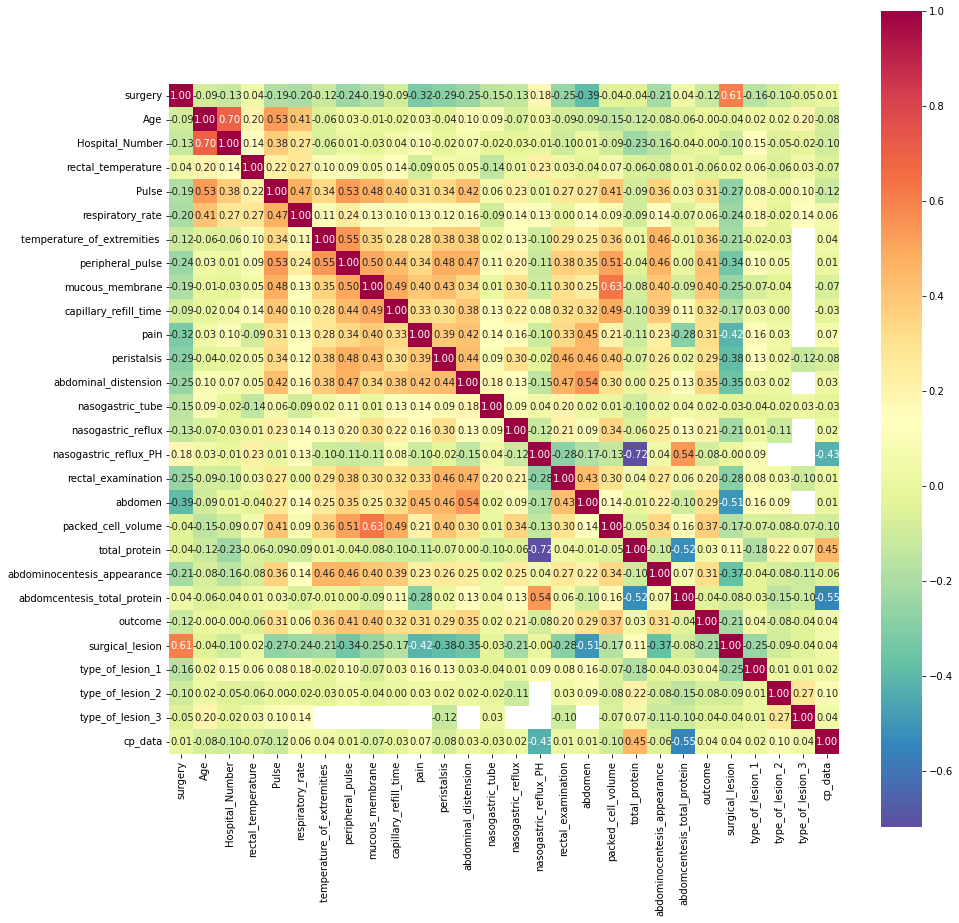

In [ ]:
plt.rcParams['figure.figsize'] = [15, 15]
corrmat = df_entrenamiento.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 yticklabels=df_entrenamiento.columns, 
                 xticklabels=df_entrenamiento.columns, 
                 cmap="Spectral_r")
plt.show()

#¿Qué tipo de problema es? ​

​

Debido a la naturaleza del dataset es posible aplicar algoritmos de clasificación con el atributo surgical_lesion donde podríamos definir si de acuerdo a las características, la lesión que presenta el caballo requiere de cirugía o no.​

Debido que los datos de las columnas 25,26 y 27 son tipo de lesion y cada uno de los registros se divide en:

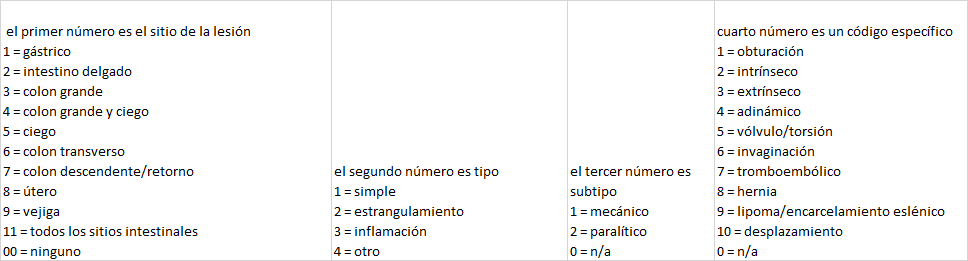 se debe realizar procesamiendo del mismo para identificar cada una de estas nuevas variables

In [ ]:
tipo_lesion1=df_entrenamiento['type_of_lesion_1'];

importamos copy para poder realizar copia del dataframe

In [ ]:
import copy as cp

Ahora eliminamos del dataframe de entrenamiento y de prueba la columna a predecir outcome y realizamos cambio de una variable multiclase(con 3 opciones) a una binaria(1 vivio y 2 murio), reemplazando los registros de 3 con 2 en ambos datasets

In [ ]:
X_entrenamiento = cp.deepcopy(df_entrenamiento.drop(['outcome'],axis=1).values)
Y_mc_entrenamiento=cp.deepcopy(df_entrenamiento['outcome'].values)
Y_bin_entrenamiento=cp.deepcopy(df_entrenamiento['outcome'].values)
Y_bin_entrenamiento[Y_bin_entrenamiento>2]=2

X_prueba=cp.deepcopy(df_prueba.drop(['outcome'],axis=1).values)
Y_mc_prueba=cp.deepcopy(df_prueba['outcome'].values)
Y_bin_prueba=cp.deepcopy(df_prueba['outcome'].values)
Y_bin_prueba[Y_bin_prueba>2]=2


print(X_entrenamiento)
print(Y_mc_entrenamiento)
print(Y_bin_entrenamiento)
df_entrenamiento.head()

print(X_prueba)
print(Y_mc_prueba)
print(Y_bin_prueba)
df_prueba.head()


[[2.00000e+00 1.00000e+00 5.30101e+05 ... 0.00000e+00 0.00000e+00
  2.00000e+00]
 [1.00000e+00 1.00000e+00 5.34817e+05 ... 0.00000e+00 0.00000e+00
  2.00000e+00]
 [2.00000e+00 1.00000e+00 5.30334e+05 ... 0.00000e+00 0.00000e+00
  1.00000e+00]
 ...
 [1.00000e+00 1.00000e+00 5.29386e+05 ... 0.00000e+00 0.00000e+00
  2.00000e+00]
 [1.00000e+00 1.00000e+00 5.30612e+05 ... 0.00000e+00 0.00000e+00
  1.00000e+00]
 [1.00000e+00 1.00000e+00 5.34618e+05 ... 0.00000e+00 0.00000e+00
  2.00000e+00]]
[ 2.  3.  1.  2.  2.  1.  1.  2.  3.  1.  1.  1.  1.  2.  1.  2.  2.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  2.  3.  1.  1.  1.  3.
  3.  1.  1.  2.  2.  1.  1.  3.  3.  2.  1.  1.  2.  2.  1.  2.  1.  1.
  3.  2.  1.  2.  2.  2.  1.  1.  2.  3.  1.  1.  1.  1.  1.  1.  3.  1.
  2.  2.  2.  3.  1.  1.  2.  1.  2.  1.  1.  2.  1.  1.  2.  3.  1.  1.
  1.  2.  1.  2.  1.  1.  1.  3.  1.  1.  1.  3.  1.  1.  2.  1.  1.  1.
  3.  2.  2.  1.  1.  2.  1.  1.  1.  3.  1.  1.  1.  3.  1.  2.  3.  

,surgery,Age,Hospital_Number,rectal_temperature,Pulse,respiratory_rate,temperature_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdominocentesis_appearance,abdomcentesis_total_protein,outcome,surgical_lesion,type_of_lesion_1,type_of_lesion_2,type_of_lesion_3,cp_data
0,2.0,1.0,530101.0,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2.0,11300.0,0.0,0.0,2.0
1,1.0,1.0,534817.0,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2.0,2208.0,0.0,0.0,2.0
2,2.0,1.0,530334.0,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2.0,0.0,0.0,0.0,1.0
3,1.0,9.0,5290409.0,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1.0,2208.0,0.0,0.0,1.0
4,2.0,1.0,530255.0,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2.0,4300.0,0.0,0.0,2.0


Se verifica si el dataset está balanceado en cuanto a su salida, para ello consultamos los posibles valores de los datos registrados en la variable a predecir en el dataframe de entrenamiento

In [ ]:
df_entrenamiento['outcome'].value_counts()

1.0    178
2.0     77
3.0     44
Name: outcome, dtype: int64

Trabajamos los Nans por cada columna y definimos que hacer con ellos

Descripción de los datos para identificar qué hacer con los datos faltantes:
Información de atributos:

1: ¿cirugía?
1 = Sí, tuvo cirugía
2 = Fue tratado sin cirugía

2: Edad
1 = Caballo adulto
2 = Joven (< 6 meses)

3: Número de hospital
- identificación numérica
- el número de caso asignado al caballo (puede no ser único si el caballo es tratado > 1 vez)

4: temperatura rectal
- lineal
- en grados centígrados.
- Puede haber una temperatura elevada debido a una infección.
- la temperatura puede reducirse cuando el animal está en estado de shock tardío
- la temperatura normal es de 37,8
- este parámetro generalmente cambiará a medida que avanza el problema, p. puede comenzar normal, luego elevarse debido a la lesión, volviendo al rango normal cuando el caballo entra en estado de shock
5: pulso
- lineal
- la frecuencia cardíaca en latidos por minuto
- es un reflejo de la condición cardíaca: 30 -40 es normal para los adultos
- es raro tener una frecuencia inferior a la normal aunque los caballos atléticos pueden tener una frecuencia de 20-25
- los animales con lesiones dolorosas o que sufren de shock circulatorio pueden tener una frecuencia cardíaca elevada

6: frecuencia respiratoria
- lineal
- la frecuencia normal es 8 a 10
- la utilidad es dudosa debido a las grandes fluctuaciones

7: temperatura de las extremidades
- una indicación subjetiva de la circulación periférica
- valores posibles:
1 = Normal
2 = Cálido
3 = Frío
4 = Frío
- extremidades frías a frías indican posible shock
- extremidades calientes deben correlacionarse con una temperatura rectal elevada.

8: pulso periférico
- subjetivo
- los valores posibles son:
1 = normal
2 = aumentado
3 = reducido
4 = ausente
- una pp normal o aumentada indica una circulación adecuada, mientras que una pp reducida o ausente indica una mala perfusión

9: membranas mucosas
- una medida subjetiva del color
- los valores posibles son:
1 = rosa normal
2 = rosa brillante
3 = rosa pálido
4 = cianótico pálido
5 = rojo brillante/inyectado
6 = cianótico oscuro
- 1 y 2 probablemente indican una circulación normal o levemente aumentada
- 3 pueden ocurrir en estado de shock temprano
- 4 y 6 son indicativos de compromiso circulatorio grave
- 5 es más indicativo de septicemia

10: tiempo de llenado capilar
- un juicio clínico. Cuanto más se recarga, peor es la circulación
- valores posibles
1 = < 3 segundos
2 = >= 3 segundos

11: dolor - un juicio subjetivo del nivel de dolor del caballo
- valores posibles:
1 = alerta, sin dolor
2 = deprimido
3 = dolor leve intermitente
4 = dolor intenso intermitente
5 = dolor intenso continuo
- ¡NO debe tratarse como una variable ordenada o discreta!
- En general, cuanto más doloroso, más probable es que requiera cirugía
- el tratamiento previo del dolor puede enmascarar el nivel de dolor hasta cierto punto

12: peristalsis
- una indicación de la actividad en el intestino del caballo. A medida que el intestino se vuelve más distendido o el caballo se vuelve más tóxico, la actividad disminuye
- valores posibles:
1 = hipermotilidad
2 = normal
3 = hipomotilidad
4 = ausente

13: distensión abdominal
- Un parámetro IMPORTANTE.
- valores posibles
1 = ninguno
2 = leve
3 = moderado
4 = severo
- es probable que un animal con distensión abdominal sienta dolor y tenga una motilidad intestinal reducida.
- es probable que un caballo con distensión abdominal severa requiera cirugía solo para aliviar la presión

14: sonda nasogástrica
- esto se refiere a cualquier gas que sale de la sonda
- valores posibles:
1 = ninguno
2 = leve
3 = significativo
- una tapa de gas grande en el estómago es probable que provoque molestias al caballo

15: reflujo nasogástrico
- valores posibles
1 = ninguno
2 = > 1 litro
3 = < 1 litro
- a mayor cantidad de reflujo, mayor probabilidad de que exista alguna obstrucción grave al paso del líquido desde el resto del intestino

16: reflujo nasogástrico PH
- lineal
- la escala es de 0 a 14, siendo 7 neutral
- los valores normales están en el rango de 3 a 4

17: tacto rectal - heces
- valores posibles
1 = normal
2 = aumentado
3 = disminuido
4 = ausente
- la ausencia de heces probablemente indica una obstrucción

18: abdomen
- valores posibles
1 = normal
2 = otro
3 = heces firmes en el intestino grueso
4 = intestino delgado distendido
5 = intestino grueso distendido
- 3 es probablemente una obstrucción causada por una impactación mecánica y normalmente se trata médicamente
- 4 y 5 indican una lesión quirúrgica

19: volumen celular empaquetado
- lineal
- el número de glóbulos rojos por volumen en la sangre
: el rango normal es de 30 a 50. El nivel aumenta a medida que la circulación se ve comprometida o el animal se deshidrata.

20: proteína total
- lineal
- los valores normales se encuentran en el rango de 6-7,5 (gms/dL)
- cuanto mayor sea el valor, mayor será la deshidratación

21: apariencia de abdominocentesis
- se coloca una aguja en el abdomen del caballo y se obtiene líquido de
la cavidad abdominal
- valores posibles:
1 = claro
2 = turbio
3 = serosanguinolento
- el líquido normal es claro mientras que turbio o serosanguinolento indica un intestino comprometido

22: abdomcentesis proteína total
- lineal
- cuanto mayor sea el nivel de proteína, más probable es que tenga un intestino comprometido. Los valores están en gms/dL

23: resultado
: ¿qué le sucedió finalmente al caballo?
- valores posibles:
1 = vivido
2 = murió
3 = fue sacrificado

24: ¿lesión quirúrgica?
- retrospectivamente, ¿el problema (lesión) fue quirúrgico?
- todos los casos son operados o autopsiados para que este valor y el tipo de lesión sean siempre conocidos
- valores posibles:
1 = Sí
2 = No

25, 26, 27: tipo de lesión
- el primer número es el sitio de la lesión
1 = gástrico
2 = intestino delgado
3 = colon grande
4 = colon grande y ciego
5 = ciego
6 = colon transverso
7 = colon descendente/retorno
8 = útero
9 = vejiga
11 = todos los sitios intestinales
00 = ninguno
- el segundo número es tipo
1 = simple
2 = estrangulamiento
3 = inflamación
4 = otro
- el tercer número es subtipo
1 = mecánico
2 = paralítico
0 = n/a
- cuarto número es un código específico
1 = obturación
2 = intrínseco
3 = extrínseco
4 = adinámico
5 = vólvulo/torsión
6 = invaginación
7 = tromboembólico
8 = hernia
9 = lipoma/encarcelamiento eslénico
10 = desplazamiento
0 = n/a
28: cp_data: ¿
hay datos patológicos para este caso?
1 = Sí
2 = No
: esta variable no tiene importancia ya que no se incluyen ni recopilan datos de patología para estos casos

Identificamos cantidad de registros nulos por cada columna en el de variables de entrenamiento:


In [ ]:
print(np.sum(np.isnan(X_entrenamiento),axis=0))

[  1   0   0  60  24  58  56  69  47  32  55  44  56 104 106 247 102 118
  29  33 165 198   0   0   0   0   0]


1 surgery= numerica- sin orden-mediana

2 Age= No tiene datos nulos

3 Hospital Number= no tiene datos nulos

4 rectal temperature= continua -mediana

5 pulse= numerica discreta- mediana

6 respiratory rate= numerica discreta- mediana

7 temperature of extremities= categorica-moda

8 peripheral pulse= categorica- moda

9 mucous membranes= categorica- moda

10 capillary refill time= categorica- moda

11 pain=categorico-moda

12 peristalsis= categorico-moda

13 abdominal distension=categorico-moda

14 nasogastric tube=categorico- moda

15 nasogastric reflux=categorico- moda

16 nasogastric reflux PH=categorico- moda

17 rectal examination=categorico- moda

18 abdomen=categorico - moda

19 packed cell volume=numerico discreto -mediana

20 total protein=numerico continuo -mediana

21 abdominocentesis appearance=categorico -moda

22 abdomcentesis total protein=entero continuo

 outcome=categorico - no tiene vacios Dato a predecir (Y)

23 surgical lesion=categorico- no tiene vacios- 

24 type of lesion 1- no tiene vacios

25 type of lesion 2- no tiene vacios

26 type of lesion 3- no tiene vacios

27 cp_data - no tiene vacios

Los valores categoricos los reemplazaremos por la moda

Los valores numéricos los reemplazaremos por la mediana


Aquí podemos observar que está mas hacia los caballos que vivieron, sin embargo al volver los 3 como un 2, tendríamos 178 vivos y 121 muertos, con una diferencia del 33% aprox.

Ahora identificamos el registro nulo de la variable Y de entrenamiento y la eliminamos tanto de las variables como en el valor a predecir

In [ ]:
#print(np.isnan(Y_mc_entrenamiento))
pos_nulo_entrenamiento=np.argwhere(np.isnan(Y_mc_entrenamiento))
print(Y_mc_entrenamiento[pos_nulo_entrenamiento])

Y_mc_entrenamiento=Y_mc_entrenamiento[~np.isnan(Y_mc_entrenamiento)]
Y_bin_entrenamiento=Y_bin_entrenamiento[~np.isnan(Y_bin_entrenamiento)]

[[nan]]


In [ ]:
X_entrenamiento=np.asarray(X_entrenamiento)
np.delete(X_entrenamiento, 132, axis=0)

array([[2.00000e+00, 1.00000e+00, 5.30101e+05, ..., 0.00000e+00,
        0.00000e+00, 2.00000e+00],
       [1.00000e+00, 1.00000e+00, 5.34817e+05, ..., 0.00000e+00,
        0.00000e+00, 2.00000e+00],
       [2.00000e+00, 1.00000e+00, 5.30334e+05, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       ...,
       [1.00000e+00, 1.00000e+00, 5.29386e+05, ..., 0.00000e+00,
        0.00000e+00, 2.00000e+00],
       [1.00000e+00, 1.00000e+00, 5.30612e+05, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [1.00000e+00, 1.00000e+00, 5.34618e+05, ..., 0.00000e+00,
        0.00000e+00, 2.00000e+00]])

In [ ]:
print(sum(np.isnan(X_entrenamiento)))
X_entrenamiento = np.delete(X_entrenamiento,(132), axis = 0)
X_entrenamiento.shape


[  1   0   0  60  24  58  56  69  47  32  55  44  56 104 106 247 102 118
  29  33 165 198   0   0   0   0   0]


(299, 27)

Teniendo en cuenta que contamos con registro en Y nulo, vamos a eliminar el registro completo

In [ ]:
import statistics as st

replace_values=[np.nanmedian(X_entrenamiento[:,0]),#Surgery reemplazado datos nulos por mediana
                None,
                None,
                np.nanmedian(X_entrenamiento[:,3]),#rectal temperature= continua -mediana
                np.nanmedian(X_entrenamiento[:,4]),#pulse= numerica discreta- mediana
                np.nanmedian(X_entrenamiento[:,5]),#respiratory rate= numerica discreta- mediana
                st.mode(X_entrenamiento[:,6]),#temperature of extremities= categorica-moda
                st.mode(X_entrenamiento[:,7]),#peripheral pulse= categorica- moda
                st.mode(X_entrenamiento[:,8]),# mucous membranes= categorica- moda
                np.nanmedian(X_entrenamiento[:,9]),# capillary refill time= categorica- moda
                st.mode(X_entrenamiento[:,10]),# pain=categorico-moda
                st.mode(X_entrenamiento[:,11]),#  peristalsis= categorico-moda
                st.mode(X_entrenamiento[:,12]),# abdominal distension=categorico-moda,
                np.nanmedian(X_entrenamiento[:,13]),# nasogastric tube=categorico- moda
                st.mode(X_entrenamiento[:,14]),# nasogastric reflux=categorico- moda
                st.mode(X_entrenamiento[:,15]),# nasogastric reflux PH=categorico- moda
                st.mode(X_entrenamiento[:,16]),# rectal examination=categorico- moda
                st.mode(X_entrenamiento[:,17]),# abdomen=categorico - moda
                np.nanmedian(X_entrenamiento[:,18]),# packed cell volume=numerico discreto -mediana
                np.nanmedian(X_entrenamiento[:,19]),# total protein=numerico continuo -mediana
                np.nanmedian(X_entrenamiento[:,20]),# abdominocentesis appearance=categorico -moda
                st.mode(X_entrenamiento[:,21]),# abdomcentesis total protein=entero continuo
                None,# -Surgical
                None,# -type lesion 1
                None,# -type lesion 2
                None,# -type lesion 3
                None
                ]

print(replace_values)


for i in range(X_entrenamiento.shape[1]):
  X_entrenamiento[np.isnan(X_entrenamiento[:,i]),i]=replace_values[i]
  X_prueba[np.isnan(X_prueba[:,i]),i]=replace_values[i]

print(X_entrenamiento)
print(X_prueba)

print(np.sum(np.isnan(X_entrenamiento),axis=0))
print(np.sum(np.isnan(X_prueba),axis=0))

[1.0, None, None, 38.2, 64.0, 25.0, 3.0, 1.0, 1.0, 1.0, 3.0, 3.0, 1.0, 2.0, 1.0, 2.0, 4.0, 5.0, 45.0, 7.5, 2.0, 2.0, None, None, None, None, None]
[[2.00000e+00 1.00000e+00 5.30101e+05 ... 0.00000e+00 0.00000e+00
  2.00000e+00]
 [1.00000e+00 1.00000e+00 5.34817e+05 ... 0.00000e+00 0.00000e+00
  2.00000e+00]
 [2.00000e+00 1.00000e+00 5.30334e+05 ... 0.00000e+00 0.00000e+00
  1.00000e+00]
 ...
 [1.00000e+00 1.00000e+00 5.29386e+05 ... 0.00000e+00 0.00000e+00
  2.00000e+00]
 [1.00000e+00 1.00000e+00 5.30612e+05 ... 0.00000e+00 0.00000e+00
  1.00000e+00]
 [1.00000e+00 1.00000e+00 5.34618e+05 ... 0.00000e+00 0.00000e+00
  2.00000e+00]]
[[2.00000e+00 1.00000e+00 5.30101e+05 ... 0.00000e+00 0.00000e+00
  2.00000e+00]
 [1.00000e+00 1.00000e+00 5.34817e+05 ... 0.00000e+00 0.00000e+00
  2.00000e+00]
 [2.00000e+00 1.00000e+00 5.30334e+05 ... 0.00000e+00 0.00000e+00
  1.00000e+00]
 ...
 [1.00000e+00 1.00000e+00 5.29386e+05 ... 0.00000e+00 0.00000e+00
  2.00000e+00]
 [1.00000e+00 1.00000e+00 5.3061

Probamos la regresión logistica con la variable multiclase de outcome Y_MC

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_mc = LogisticRegression().fit(X_entrenamiento, Y_mc_entrenamiento)
print("Training set score: {:.3f}".format(logreg_mc.score(X_entrenamiento, Y_mc_entrenamiento)))
print("Test set score: {:.3f}".format(logreg_mc.score(X_prueba, Y_mc_prueba)))
print("List of Coefficients: ", logreg_mc.coef_)

Training set score: 0.595


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


ValueError: ignored

Y ahora probamos la variable binaria con regresión logistica y comparamos score con la anterior

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_bin = LogisticRegression().fit(X_entrenamiento, Y_bin_entrenamiento)
print("Training set score: {:.3f}".format(logreg_bin.score(X_entrenamiento, Y_bin_entrenamiento)))
print("Test set score: {:.3f}".format(logreg_bin.score(X_prueba, Y_bin_prueba)))
print("List of Coefficients: ", logreg_bin.coef_)

#Balanceo
Aplicamos el Random Oversampling para nivelar los registros de caballos muertos hacia los registros de caballos vivos

In [ ]:
under_sampler = RandomUnderSampler(random_state=0)
X_res, y_res = under_sampler.fit_resample(X_entrenamiento, Y_bin_entrenamiento)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(Y_bin_prueba)}")
logreg = LogisticRegression().fit(X_res, y_res)
print("Training set score: {:.3f}".format(logreg.score(X_res, y_res)))
print("Test set score: {:.3f}".format(logreg.score(X_prueba, Y_bin_prueba)))
print("List of Coefficients: ", logreg.coef_)

#Selección de variables
Aplicamos RandomForest